**Системы аналитических вычислений.**

Лабораторная работа №1.

Студент: Короткевич Л. В., М8О-208Б-19

**Часть 1:** shabbat, shalom!

При помощи функции отображения графиков отобразить фигуру "могендо́вид", как совокупность двух повернутых треугольников.

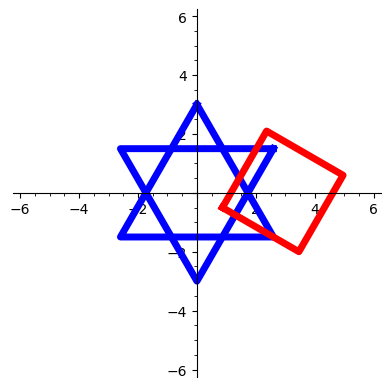

In [1]:
triangleRad = 3 # радиус треугольника
triangleEdge = triangleRad * sqrt(3)
anglePerRad = 30 * pi / 180 # угол между радиусами в градусах

triangleMatrix = matrix([
    [0, triangleRad], 
    [triangleRad * cos(anglePerRad), -triangleRad * sin(anglePerRad)],
    [-triangleRad * cos(anglePerRad), -triangleRad * sin(anglePerRad)],
    [0, triangleRad]
])

rotateAngle = 60 * pi / 180 # угол поворота треуг. (град.)
rotateMatrix = matrix([
    [cos(rotateAngle), -sin(rotateAngle)],
    [sin(rotateAngle), cos(rotateAngle)]
])

# чтобы сильно не отступать от задания, изображу повернутый квадрат побок с могендовидом
sqEdge = triangleRad
sqMatrix = matrix([
    [0, 0],
    [sqEdge, 0],
    [sqEdge, sqEdge],
    [0, sqEdge],
    [0, 0]
])

for i in range(5):
    sqMatrix[i, 0] += 1

sqRotateAngle = 30 * pi / 180 # угол поворота треуг. (град.)
sqRotateMatrix = matrix([
    [cos(sqRotateAngle), -sin(sqRotateAngle)],
    [sin(sqRotateAngle), cos(sqRotateAngle)]
])
sqMatrix *= sqRotateMatrix
    
axisSize = 2 * triangleRad # границы отобр. по осям
show(
    line(triangleMatrix, thickness = 5) +
    line(triangleMatrix * rotateMatrix, thickness = 5) +
    line(sqMatrix, thickness = 5, color = 'red'),
    xmin = -axisSize, xmax = axisSize, ymin = -axisSize, ymax = axisSize, 
    aspect_ratio = 1
)



**Часть 2:** исследование функции.

Для заданной формулой функции найти:
<ol>
    <li>Область определения функции.</li>
    <li>Является ли функция четной или нечетной, является ли периодической.</li>
    <li>Точки пересечения графика с осями координат.</li>
    <li>Промежутки знакопостоянства.</li>
    <li>Промежутки возрастания и убывания.</li>
    <li>Точки экстремума и значения в этих точках.</li>
    <li>Непрерывность. Наличие точек разрыва и их классификация.</li>
    <li>Асимптоты.</li>
</ol>

Вариант 0: $ \frac{\sin(2x^3)^2}{x^2} $

In [4]:
# определим нашу функцию, как sage.symbolic.expression.Expression
y(x) = sin(2*x**3)**2/x**3 
type(y)

<class 'sage.symbolic.expression.Expression'>

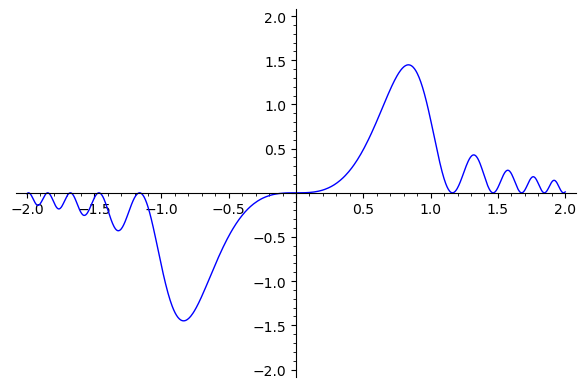

In [5]:
# изобразим её
plot(y, xmin = -2, xmax = 2, ymin = -2, ymax = 2)

Приступим, наконец, к исследованию функции.

1. **Область определения функции.**

* Функция x, встречающаяся в знаменателе, накладывает ограничение $x \neq 0$. 

Опишем область определения $D$ с помощью SageMath:


In [4]:
var('x')
eq1 = x
D = solve(eq1 != 0, x, algorithm='sympy')
D


[[x < 0], [x > 0]]

2. **Четность функции.**

* Проверим четность функции:

In [5]:
(y(x) - y(-x)).expand().simplify()

2*sin(2*x^3)^2/x^3

* Проверим нечетность функции:

In [6]:
(y(x) + y(-x)).expand().simplify()

0

* Проверим периодичность:

In [7]:
var('x T')
eq1 = y(x) - y(x + T)
eq1.simplify_full()

-4*(x^3*cos(T^3 + 3*T^2*x + 3*T*x^2 + x^3)^2*sin(T^3 + 3*T^2*x + 3*T*x^2 + x^3)^2 - (T^3 + 3*T^2*x + 3*T*x^2 + x^3)*cos(x^3)^2*sin(x^3)^2)/(T^3*x^3 + 3*T^2*x^4 + 3*T*x^5 + x^6)

In [8]:
eq1 = _
show(eq1)

-4*(x^3*cos(T^3 + 3*T^2*x + 3*T*x^2 + x^3)^2*sin(T^3 + 3*T^2*x + 3*T*x^2 + x^3)^2 - (T^3 + 3*T^2*x + 3*T*x^2 + x^3)*cos(x^3)^2*sin(x^3)^2)/(T^3*x^3 + 3*T^2*x^4 + 3*T*x^5 + x^6)

In [9]:
eq1(x=1, T=1)

-1/2*cos(8)^2*sin(8)^2 + 4*cos(1)^2*sin(1)^2

In [10]:
eq1 = y(x) - y(x + T)
solve(eq1, T, algorithm='sympy')

Complement(ConditionSet(T, Eq(x**3*sin(2*(T + x)**3)**2 - (T + x)**3*sin(2*x**3)**2, 0), Complexes), FiniteSet(-x))

Еще из графика можно было заключить, что функция является **нечетной, не периодической**. Но теперь мы убедились в этом с помощью инструментария SageMath. 

3.1. **Точки пересечения графика с осями координат.**

На примере **исходной** функции. 

**Примечание**: Стоит сразу заметить, что в силу ОДЗ - $x \neq 0$ - точек пересечения с осью ордиант у данной функции нет.

In [11]:
solve(y==0, x, algorithm='sympy')

Complement(ConditionSet(x, Eq(sin(2*x**3)**2, 0), Complexes), FiniteSet(0))

In [12]:
find_root(y(x)==0, -3, -1)

-2.2236817871108823

In [13]:
find_root(y(x)==0, 1, 3)

2.2236817871108823

Корней у нас много, за сим привел лишь два. Наблюдательно: корни на зеркально-противоположных интервалах, как и подобает корням нечетной функции, различны лишь знаком.

3.2. **Точки пересечения графика с осями координат.**

<i>Этот пункт я выполнил из-за недопонимания при прочтении примечания: он здесь лишний. Но я решил оставить. </i>

На примере функции $(((3*x**3 + 2*x**2 - 10*x)**(2))**(1/4)) / (4*x)$.

**Примечание**: Стоит сразу заметить, что в силу ОДЗ - $x \neq 0$ - точек пересечения с осью ордиант у данной функции нет.

In [14]:
var('x')
g(x) = (((3*x**3 + 2*x**2 - 10*x)**(2))**(1/4)) / (4*x)
g.simplify().show()

x |--> 1/4*((3*x^3 + 2*x^2 - 10*x)^2)^(1/4)/x

Для определения точек пересечения, разобъем исходную функцию на две, упростив подкоренное выражение.

$\frac{\sqrt{\pm(3x^3+2x^2-10x)}}{4x}$

In [15]:
g1(x) = sqrt( 3*x**3 + 2*x**2 - 10*x ) / (4*x)
g1.simplify().show()

x |--> 1/4*sqrt(3*x^3 + 2*x^2 - 10*x)/x

In [16]:
solve(g1==0,x,algorithm='sympy')

[x == 1/3*sqrt(31) - 1/3, x == -1/3*sqrt(31) - 1/3]

Теперь давайте рассмотрим случай исходной функции, раскрытой со знаком минус.

In [17]:
g2(x) = sqrt( -(3*x**3 + 2*x**2 - 10*x) ) / (4*x)
g2.simplify().show()

x |--> 1/4*sqrt(-3*x^3 - 2*x^2 + 10*x)/x

In [18]:
solve(g2==0,x,algorithm='sympy')

[x == 1/3*sqrt(31) - 1/3, x == -1/3*sqrt(31) - 1/3]

4. **Промежутки знакопостоянства.**

Промежутки знакопостоянства вычисляются незамысловатым образом. Необходимо рассмотреть два неравенства.

In [38]:
solve(y(x)>=0,x)

[[sin(2*x^3) == 0, x != 0], [0 < x, sin(2*x^3) != 0]]

In [20]:
solve(y(x)<0,x) # нетрудно догадаться, что -x^3 > 0 <=> x < 0

[[-x^3 > 0, sin(2*x^3) != 0]]

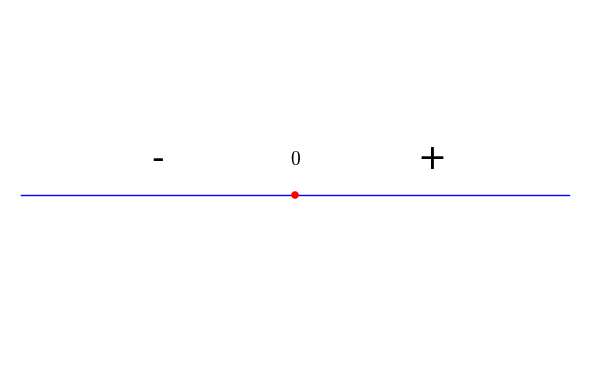

In [21]:
intervals_of_constancy = plot(0, xmin=-0.1, xmax=0.1, ymin=-0.5, ymax=0.5) # creating a plot

intervals_of_constancy += point( (0, 0), color="red", size=30, zorder=10 ) # adding red dots

x_margin = 0.1 # смещение по x текста над осью
intervals_of_constancy  += text("$0$", (0, x_margin), color="black", fontsize=14) # adding points

y_margin = 0.1
intervals_of_constancy  += text("-", (-0.05, y_margin), color="black", fontsize=25) # adding points
intervals_of_constancy  += text("+", (0.05, y_margin), color="black", fontsize=25) # adding points


intervals_of_constancy.show(axes=False)

5. **Промежутки возрастания и убывания**.

Найдем производную и её интервалы знакопостоянства.

In [22]:
deriv = y.derivative()
deriv.show()

x |--> 12*cos(2*x^3)*sin(2*x^3)/x - 3*sin(2*x^3)^2/x^4

In [23]:
solve(deriv>0,x,to_poly_solve=True)

[[-sin(2*x^3) > 0, -4*x^3*cos(2*x^3) + sin(2*x^3) > 0],
 [sin(2*x^3) > 0, 4*x^3*cos(2*x^3) - sin(2*x^3) > 0]]

In [24]:
solve(deriv>0,x,to_poly_solve='force')

[[-sin(2*x^3) > 0, -4*x^3*cos(2*x^3) + sin(2*x^3) > 0],
 [sin(2*x^3) > 0, 4*x^3*cos(2*x^3) - sin(2*x^3) > 0]]

In [25]:
solve(deriv>0,x,algorithm='sympy')

ConditionSet(x, 12*sin(2*x**3)*cos(2*x**3)/x - 3*sin(2*x**3)**2/x**4 > 0, Reals)

Никто не берет наше неравенство. Досада. Решим графически.

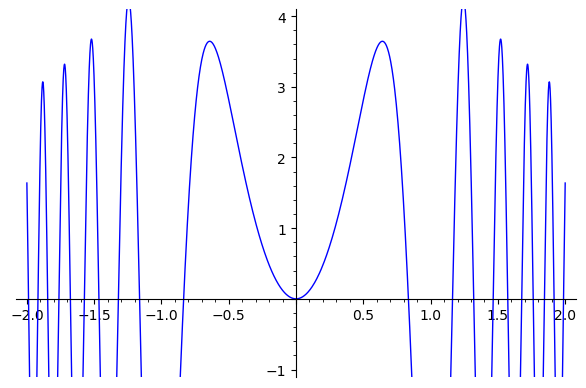

In [26]:
plot(deriv, xmin = -2, xmax = 2, ymin = -1, ymax = 4)

За пример возьмем правую часть графика производной: примерно до 0.7 наша функция возрастает, ибо производная ее - положительна; после 0.7 и до примерно 1.2 наша функция убывает - производная отрицательна.

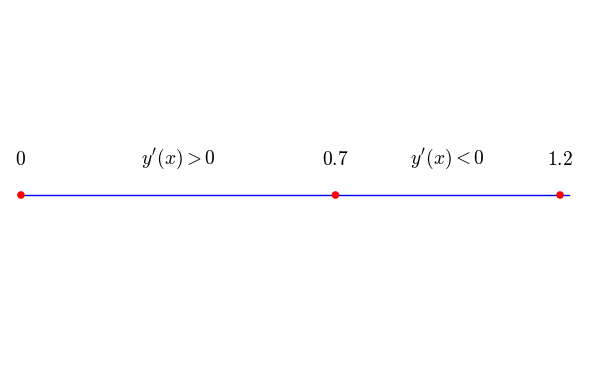

In [56]:
intervals_of_derConstancy = plot(0, xmin=0, xmax=1.22, ymin=-0.5, ymax=0.5) # creating a plot

intervals_of_derConstancy += point( (0, 0), color="red", size=30, zorder=10 ) # adding red dots
intervals_of_derConstancy += point( (0.7, 0), color="red", size=30, zorder=10 ) # adding red dots
intervals_of_derConstancy += point( (1.2, 0), color="red", size=30, zorder=10 ) # adding red dots

intervals_of_derConstancy  += text("$0$", (0, 0.1), color="black", fontsize=14) # adding points
intervals_of_derConstancy  += text("$0.7$", (0.7, 0.1), color="black", fontsize=14) # adding points
intervals_of_derConstancy  += text("$1.2$", (1.2, 0.1), color="black", fontsize=14) # adding points

y_margin = 0.1
intervals_of_derConstancy  += text("$y'(x) > 0$", (0.35, y_margin), color="black", fontsize=14) # adding points
intervals_of_derConstancy  += text("$y'(x) < 0$", (0.95, y_margin), color="black", fontsize=14) # adding points

intervals_of_derConstancy.show(axes=False)

6. **Точки экстремума и значения в этих точках.**

Нетрудно догадаться, что экстремум исходной функции на интервале, скажем, от 0 до 1.2, имеет координату $x_0 \approx 0.7$. Посчитаем значение функции в этой точке, а также левее и правее неё (с шагом в 0.3), чтобы в этом убедиться. 

In [28]:
y(0.4)

0.254604949293949

In [29]:
y(0.7)

1.16984036839357

In [30]:
y(1.0)

0.826821810431806

А второй, например, экстремум, в силу нечетности нашей функции, будет расположен, очевидно, в точке $x_1 \approx -0.7$. Покажем и это.

In [31]:
y(-1.0)

-0.826821810431806

In [32]:
y(-0.7)

-1.16984036839357

In [33]:
y(-0.4)

-0.254604949293949

7. **Непрерывность. Наличие точек разрыва и их классификация.**

Наша функция непрерывна на $D$. А в точке $x = 0$ левосторонний и правосторонний пределы равны: это точка устранимого разрыва. Покажем это.

In [34]:
limit(sin(2*x^3)^2 / (x^3), x=+0)

0

In [35]:
limit(sin(2*x^3)^2 / (x^3), x=-0)

0

8. **Асимптоты.**

Уравнения наклонных асимптот обычно ищут в виде $y = kx + b$.

По определению асимптоты:
$\lim_{x\to\infty} (kx + b - y(x)) = 0$

Находим коэффициент k:

$k = \lim_{x\to\infty} (y(x) / x)$


In [36]:
limit(sin(2*x^3)^2 / (x^4), x=infinity)

0


Находим коэффициент b:

$b = \lim_{x\to\infty} (y(x) - kx)$

In [37]:
limit(sin(2*x^3)^2 / (x^3), x=infinity)

0

Получаем уравнение горизонтальной асимптоты: $y = 0$.

А вертикальная асимптота, как нетрудно догадаться: $x = 0$. Это мы установили, когда считали пределы в точке 0.